# Basic Model Dengue Vaccination

## Description of the model

- 5 age groups: infants, children, adolescents, adults and the elderly
- born infants, died as elderly (only birth in the first group, only death as the elderly), other mortality is negligible
- considering that mortality from dengue is negligible
- considering high and no transmission seasons
- high season of 3 months, the rest is low or no transmission
- considering random introductions throughout the years, random initial 'spark'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
np.random.seed(123)

In [2]:
@np.vectorize
def beta_step(beta_0,beta_aug,t_start,t_season,t_year,t):
  # beta_0 is the basal beta
  # beta_aug is the beta at high transmission season
  # t_start is start time of the high transmission season
  # t_season is the duration of the high transmission season
  # t_year is the duration of a year (giving the function periodicity)
  # t is current time time
  # normalize time up to a year
  t_norm = t%t_year
  # and now we look for the value of the function
  if(t_norm >= t_start and t_norm <= t_start + t_season):
    value = beta_aug
  else:
    value = beta_0
  return value

In [90]:
@np.vectorize
def beta_cos(beta_0,beta_aug,t_start,t_season,t_year,t):
  # beta_0 is the mean value
  # beta_aug is the amplitude
  # t_start is start time of the high transmission season
  # t_season is the duration of the high transmission season
  # t_year is the duration of a year (giving the function periodicity)
  # t is current time time
  # normalize time up to a year
  value = beta_aug*np.cos(2*np.pi*t/t_year) + beta_0
  return value

## Attempt 1: no transmission

- Checking how the population behaves under our parametrization 
- No transmission, just the populational model

In [3]:
def n_groups_model(y, t, N, pop, beta, gamma, mu_vec, l_vec):
    # N is number of age groups 
    S = y[0:N]
    I = y[N:2*N]
    R = y[2*N:3*N]
    IT = sum(I) #total infected
    S = np.append(S,0)
    I = np.append(I,0)
    R = np.append(R,0)
    S = np.append(0,S)
    I = np.append(0,I)
    R = np.append(0,R)
    l_vec_2 = np.append(0,l_vec)
    l_vec_2 = l_vec_2[:-1]
    dSdt = -beta*S[1:-1]*IT - mu_vec*S[1:-1] - l_vec*S[1:-1] + l_vec_2*S[:-2]
    dIdt =  beta*S[1:-1]*IT - gamma*I[1:-1] - mu_vec*I[1:-1] - l_vec*I[1:-1] + l_vec_2*I[:-2]
    dRdt =  gamma*I[1:-1] - mu_vec*R[1:-1] - l_vec*R[1:-1] + l_vec_2*R[:-2]
    dSdt[0] = dSdt[0] + nu
    return np.array([dSdt, dIdt, dRdt]).flatten()

In [4]:
N = 5
pop = 12000000
y0 = 800000/pop,1600000/pop,900000/pop,8000000/pop,700000/pop,0,0,0,0,0,0,0,0,0,0

alpha1 = 800000/pop
alpha2 = 1600000/pop
alpha3 = 900000/pop
alpha4 = 8000000/pop
alpha5 = 700000/pop

beta = 0
gamma = 1/(7.0)

nu = 100000/365 # 100k nascimentos por dia
l1 = nu/alpha1
l2 = l1*alpha1/alpha2
l3 = l2*alpha2/alpha3
l4 = l3*alpha3/alpha4
mu = l4*alpha4/alpha5

print(nu/l1,alpha1)

l_vec = np.array([l1,l2,l3,l4,0])
mu_vec = np.array([0,0,0,0,mu])


t_total = np.linspace(0, 365, 365)

y0 = alpha1,alpha2,alpha3,alpha4,alpha5,0,0,0,0,0,0,0,0,0,0

ret = odeint(n_groups_model, y0, t_total, args=(N, pop, beta, gamma, mu_vec, l_vec))

0.06666666666666665 0.06666666666666667


In [5]:
ret

array([[0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.13333333, 0.075     , ..., 0.        , 0.        ,
        0.        ]])

In [6]:
ret[:,0:5].sum(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

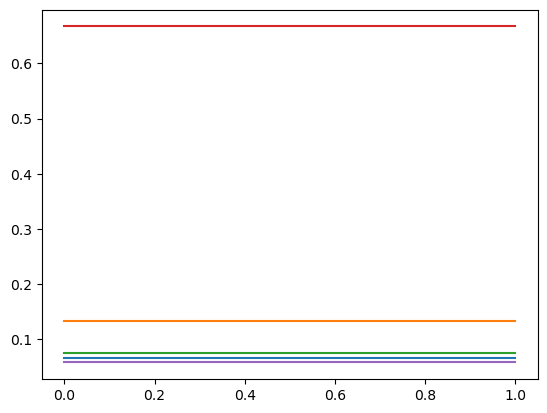

In [7]:
plt.plot(t_total/365,ret[:,0:5])

## Attempt 2: no seasonal transmission

- No seasonal transmission, constant beta
- Initial condition in adults

In [8]:
N = 5
pop = 12000000
#y0 = 800000/pop,1600000/pop,900000/pop,8000000/pop,700000/pop,0,0,0,0,0,0,0,0,0,0

alpha1 = 800000/pop
alpha2 = 1600000/pop
alpha3 = 900000/pop
alpha4 = 8000000/pop
alpha5 = 700000/pop

gamma = 1/(7.0)
beta = 2*gamma
print(beta/gamma)


l1 = 1/(365*5)
nu = alpha1*l1
l2 = l1*alpha1/alpha2
l3 = l2*alpha2/alpha3
l4 = l3*alpha3/alpha4
mu = l4*alpha4/alpha5

print(nu/l1,alpha1)

l_vec = np.array([l1,l2,l3,l4,0])
mu_vec = np.array([0,0,0,0,mu])


t_total = np.linspace(0, 365*10, 10000)

y0 = alpha1,alpha2,alpha3,(8000000-10)/pop,alpha5,0,0,0,10/pop,0,0,0,0,0,0

ret = odeint(n_groups_model, y0, t_total, args=(N, pop, beta, gamma, mu_vec, l_vec))

2.0
0.06666666666666667 0.06666666666666667


In [9]:
l_vec

array([5.47945205e-04, 2.73972603e-04, 4.87062405e-04, 5.47945205e-05,
       0.00000000e+00])

In [10]:
1/l_vec[:-1]/365

array([ 5.   , 10.   ,  5.625, 50.   ])

In [11]:
y0

(0.06666666666666667,
 0.13333333333333333,
 0.075,
 0.6666658333333333,
 0.058333333333333334,
 0,
 0,
 0,
 8.333333333333333e-07,
 0,
 0,
 0,
 0,
 0,
 0)

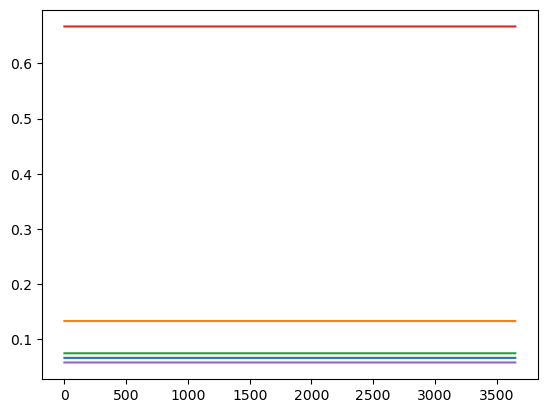

In [12]:
plt.plot(t_total,ret[:,0:5]+ret[:,5:10]+ret[:,10:])

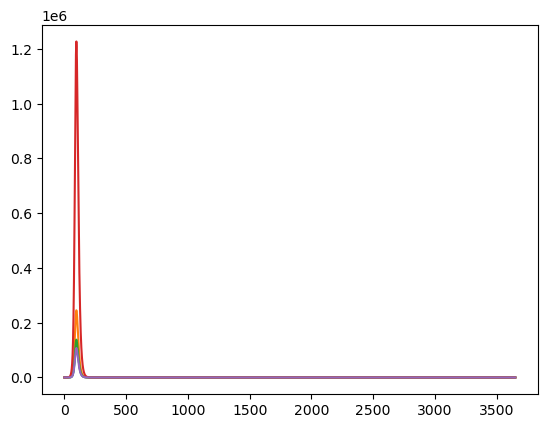

In [13]:
plt.plot(t_total,ret[:,5:10]*pop)

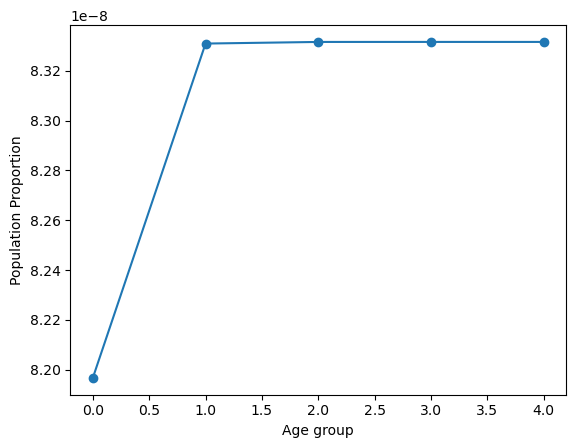

In [14]:
inf_total = ((ret[365,10:] - ret[0,10:])*pop).sum()
prop_pop = np.array([alpha1,alpha2,alpha3,alpha4,alpha5])*pop*inf_total
plt.plot(ret[364,10:]*pop/prop_pop - ret[0,10:]*pop/prop_pop, '-o')
plt.ylabel('Population Proportion')
plt.xlabel('Age group')
plt.show()

# Modifications to count number of infected

## Attempt 3: seasonal transmission high season and no season
- includes seasonal transmission, random reintroductions
- high season wih an R0 of 2, low season of no transmission
- purely seasonal disease driven by reintroductions

In [15]:
def n_groups_seasonal_model(y, t, N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec):
    # N is number of age groups 
    S = y[0:N]
    I = y[N:2*N]
    R = y[2*N:3*N]
    C = y[3*N:4*N]
    beta = beta_step(beta_0,beta_aug,t_start,t_season,t_year,t)
    IT = sum(I) #total infected
    S = np.append(S,0)
    I = np.append(I,0)
    R = np.append(R,0)
    S = np.append(0,S)
    I = np.append(0,I)
    R = np.append(0,R)
    C = np.append(C,0)
    C = np.append(0,C)
    l_vec_2 = np.append(0,l_vec)
    l_vec_2 = l_vec_2[:-1]
    dSdt = -beta*S[1:-1]*IT - mu_vec*S[1:-1] - l_vec*S[1:-1] + l_vec_2*S[:-2]
    dIdt =  beta*S[1:-1]*IT - gamma*I[1:-1] - mu_vec*I[1:-1] - l_vec*I[1:-1] + l_vec_2*I[:-2]
    dRdt =  gamma*I[1:-1] - mu_vec*R[1:-1] - l_vec*R[1:-1] + l_vec_2*R[:-2]
    dSdt[0] = dSdt[0] + nu
    dCdt = beta*S[1:-1]*IT
    return np.array([dSdt, dIdt, dRdt,dCdt]).flatten()

In [16]:
N = 5
pop = 12000000
#y0 = 800000/pop,1600000/pop,900000/pop,8000000/pop,700000/pop,0,0,0,0,0,0,0,0,0,0

alpha1 = 800000/pop
alpha2 = 1600000/pop
alpha3 = 900000/pop
alpha4 = 8000000/pop
alpha5 = 700000/pop

gamma = 1/(7.0)
beta_0 = 0*gamma # even like different from 0 it's the same
beta_aug = 3*gamma
print(beta_aug/gamma)
print(beta_0/gamma)
t_start = 0
t_season = 60
t_year = 365


l1 = 1/(365*5)
nu = alpha1*l1
l2 = l1*alpha1/alpha2
l3 = l2*alpha2/alpha3
l4 = l3*alpha3/alpha4
mu = l4*alpha4/alpha5

print(nu/l1,alpha1)

l_vec = np.array([l1,l2,l3,l4,0])
mu_vec = np.array([0,0,0,0,mu])


t_total = np.linspace(0, 365*10, 10000)

y0 = alpha1,alpha2,alpha3,(8000000-1)/pop,alpha5,0,0,0,1/pop,0,0,0,0,0,0,0,0,0,1/pop,0

ret = odeint(n_groups_seasonal_model, y0, t_total, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))

3.0
0.0
0.06666666666666667 0.06666666666666667


In [17]:
pop*ret[:,5:10].sum(axis = 1)

array([ 1.00000000e+00,  1.11010205e+00,  1.23229524e+00, ...,
       -3.68495639e-06, -3.78916788e-06, -3.89333486e-06])

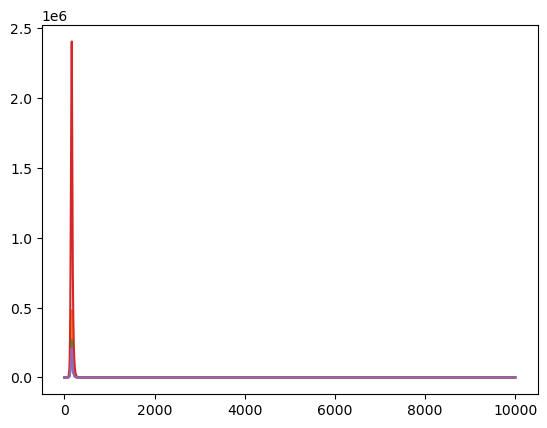

In [18]:
# plot of infected over time
plt.plot(ret[:,5:10]*pop)
plt.show()

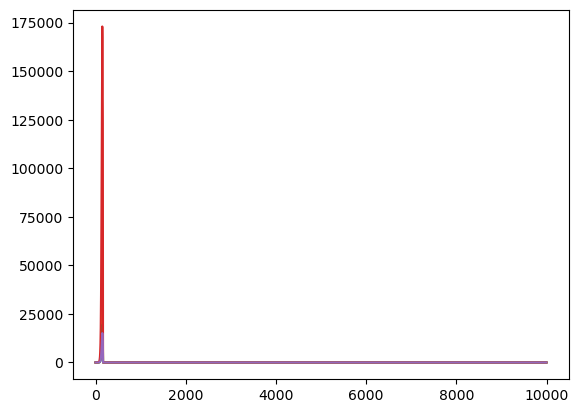

In [19]:
# plot of new infected per day over time
plt.plot((ret[1:,15:] - ret[:-1,15:])*pop)
plt.show()

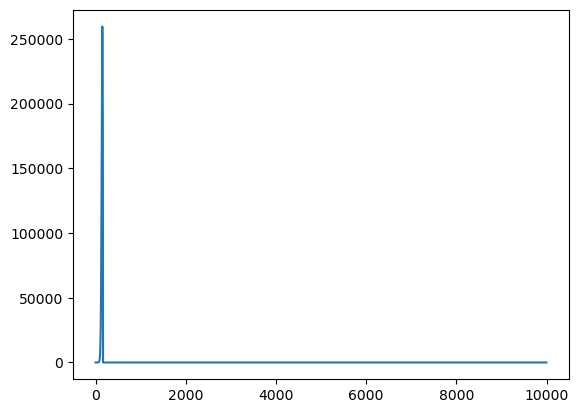

In [20]:
# plot of new infected per day over time, summing over all age groups
plt.plot(pop*(ret[1:,15:] - ret[:-1,15:]).sum(axis = 1))
plt.show()

In [21]:
prop_pop

array([7.33047606e+12, 1.46609521e+13, 8.24678557e+12, 7.33047606e+13,
       6.41416655e+12])

In [22]:
pop*(ret[1:,15:] - ret[:-1,15:]).sum(axis = 0)

array([ 549074.42866547, 1096505.5538679 ,  616783.42633613,
       5482518.66016742,  479720.44063109])

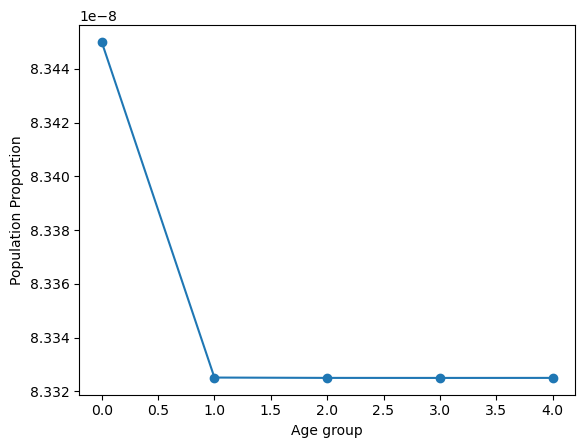

In [23]:
inf_total = pop*(ret[1:,15:] - ret[:-1,15:]).sum(axis = 1).sum()
prop_pop = np.array([alpha1,alpha2,alpha3,alpha4,alpha5])*pop*inf_total
plt.plot(pop/prop_pop*(ret[1:,15:] - ret[:-1,15:]).sum(axis = 0), '-o')
plt.ylabel('Population Proportion')
plt.xlabel('Age group')
plt.show()

## Attempt 4: seasonal transmission high season and no season + deterministic reintroductions
- includes seasonal transmission, random reintroductions
- high season wih an R0 of 2, low season of no transmission
- purely seasonal disease driven by reintroductions
- we run season by season and include an introduction

In [160]:
def modify_initial_condition(y0, prop_imported):
    y0_aux = y0.copy()
    y0[:N] = (y0_aux[:N]*pop - 1)/pop # suscteptible reduction
    y0[N:2*N] = (y0_aux[N:2*N]*pop + 1)/pop # infected grow
    y0[3*N:4*N] = (y0_aux[3*N:4*N]*pop + 1)/pop  # increase in new cases per day
    return y0

In [161]:
def modify_initial_condition_2(y0, prop_imported):
    y0_aux = y0.copy()
    y0[3] = (y0_aux[3]*pop - 1)/pop # suscteptible reduction
    y0[8] = (y0_aux[8]*pop + 1)/pop # infected grow
    y0[18] = (y0_aux[18]*pop + 1)/pop  # increase in new cases per day
    return y0

2.0
0.0
0.06666666666666667 0.06666666666666667


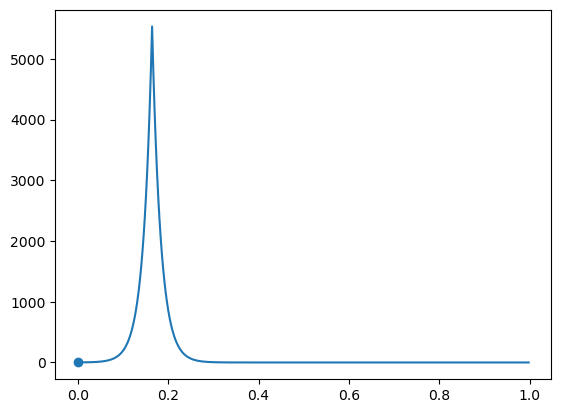

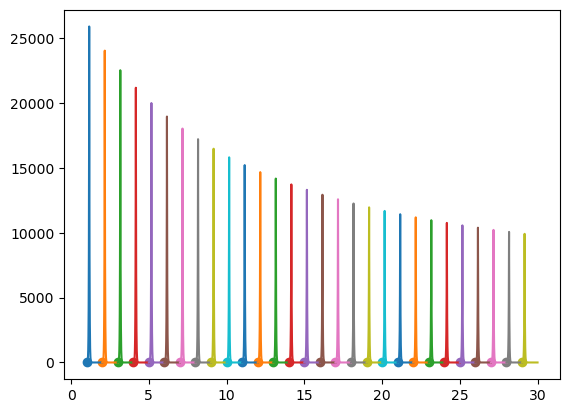

In [74]:
N = 5
pop = 12000000
#y0 = 800000/pop,1600000/pop,900000/pop,8000000/pop,700000/pop,0,0,0,0,0,0,0,0,0,0

alpha1 = 800000/pop
alpha2 = 1600000/pop
alpha3 = 900000/pop
alpha4 = 8000000/pop
alpha5 = 700000/pop

gamma = 1/(7.0)
beta_0 = 0*gamma # even like different from 0 it's the same
beta_aug = 2*gamma
print(beta_aug/gamma)
print(beta_0/gamma)
t_start = 0
t_season = 60
t_year = 365


l1 = 1/(365*5)
nu = alpha1*l1
l2 = l1*alpha1/alpha2
l3 = l2*alpha2/alpha3
l4 = l3*alpha3/alpha4
mu = l4*alpha4/alpha5

print(nu/l1,alpha1)

l_vec = np.array([l1,l2,l3,l4,0])
mu_vec = np.array([0,0,0,0,mu])


t_total = np.linspace(0, 365*10, 10000)

y0 = alpha1,alpha2,alpha3,(8000000-1)/pop,alpha5,0,0,0,1/pop,0,0,0,0,0,0,0,0,0,1/pop,0

prop_imported = 0
ret = odeint(n_groups_seasonal_model, y0, t_total, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))

seasons = 30
t_total = np.arange(0,365*seasons,1)
t_season_single = np.arange(0,365,1)

for season in np.arange(seasons):
    ret = odeint(n_groups_seasonal_model, y0, t_season_single, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))
    y0 = ret[-1,:].copy()
    y0 = modify_initial_condition(y0,prop_imported)
    plt.plot((t_season_single+season*365)/365,ret[:,N:2*N].sum(axis=1)*pop, label = season)
    plt.scatter((season*365)/365,y0[N:2*N].sum())
    if(season == 0):
        plt.show()
#plt.legend()
plt.show()

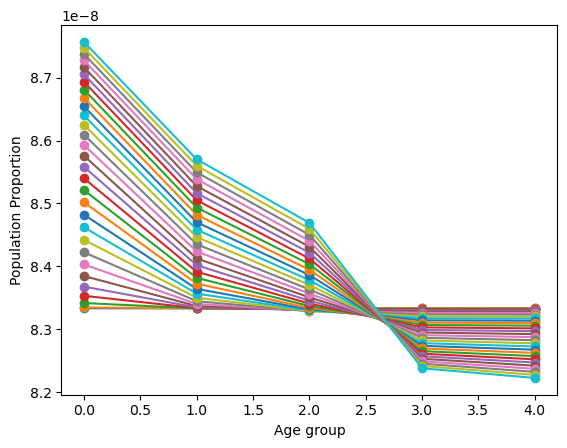

In [76]:
N = 5
pop = 12000000
#y0 = 800000/pop,1600000/pop,900000/pop,8000000/pop,700000/pop,0,0,0,0,0,0,0,0,0,0

alpha1 = 800000/pop
alpha2 = 1600000/pop
alpha3 = 900000/pop
alpha4 = 8000000/pop
alpha5 = 700000/pop

gamma = 1/(7.0)
beta_0 = 0*gamma # even like different from 0 it's the same
beta_aug = 2*gamma
#print(beta_aug/gamma)
#print(beta_0/gamma)
t_start = 0
t_season = 60
t_year = 365


l1 = 1/(365*5)
nu = alpha1*l1
l2 = l1*alpha1/alpha2
l3 = l2*alpha2/alpha3
l4 = l3*alpha3/alpha4
mu = l4*alpha4/alpha5

#print(nu/l1,alpha1)

l_vec = np.array([l1,l2,l3,l4,0])
mu_vec = np.array([0,0,0,0,mu])



y0 = alpha1,alpha2,alpha3,(8000000-1)/pop,alpha5,0,0,0,1/pop,0,0,0,0,0,0,0,0,0,1/pop,0

ret = odeint(n_groups_seasonal_model, y0, t_total, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))

seasons = 30
prop_imported = 0.00001
t_total = np.arange(0,365*seasons,1)
t_season_single = np.arange(0,365,1)

for season in np.arange(seasons):
    ret = odeint(n_groups_seasonal_model, y0, t_season_single, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))
    y0 = ret[-1,:].copy()
    y0 = modify_initial_condition(y0,prop_imported)
    inf_total = pop*(ret[1:,15:] - ret[:-1,15:]).sum(axis = 1).sum()
    #print((ret[364,10:]*pop - ret[0,10:]*pop).sum())
    prop_pop = np.array([alpha1,alpha2,alpha3,alpha4,alpha5])*pop*inf_total
    plt.plot((pop/prop_pop)*(ret[1:,15:] - ret[:-1,15:]).sum(axis = 0), '-o', label = season)
    plt.ylabel('Population Proportion')
    plt.xlabel('Age group')
    #plt.legend()
plt.show()

## Attempt 5: seasonal transmission high season and low season + non-continuous + deterministic reintroductions
- includes seasonal transmission, random reintroductions
- high season wih an R0 of 2, low season of no transmission
- purely seasonal disease driven by reintroductions
- we run season by season and include an introduction

2.0
0.8
0.06666666666666667 0.06666666666666667


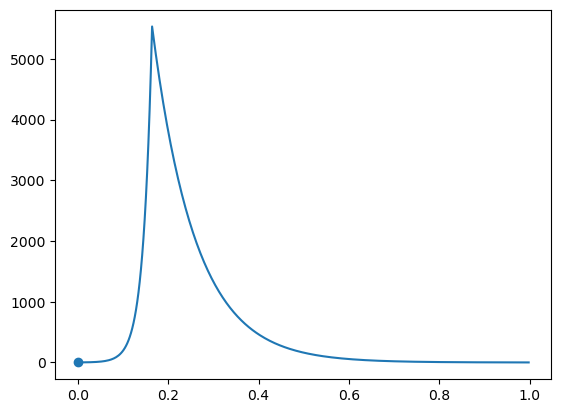

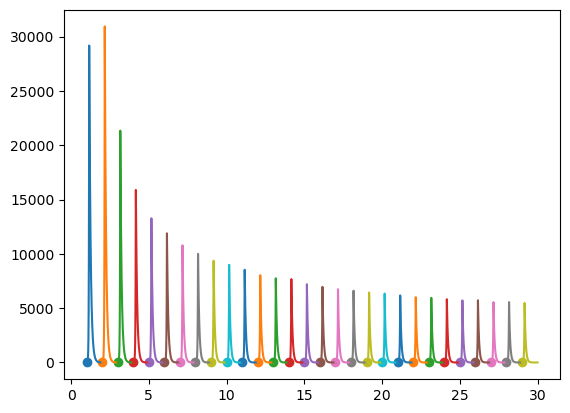

In [159]:
N = 5
pop = 12000000
#y0 = 800000/pop,1600000/pop,900000/pop,8000000/pop,700000/pop,0,0,0,0,0,0,0,0,0,0

alpha1 = 800000/pop
alpha2 = 1600000/pop
alpha3 = 900000/pop
alpha4 = 8000000/pop
alpha5 = 700000/pop

gamma = 1/(7.0)
beta_0 = 0.8*gamma # even like different from 0 it's the same
beta_aug = 2*gamma
print(beta_aug/gamma)
print(beta_0/gamma)
t_start = 0
t_season = 60
t_year = 365


l1 = 1/(365*5)
nu = alpha1*l1
l2 = l1*alpha1/alpha2
l3 = l2*alpha2/alpha3
l4 = l3*alpha3/alpha4
mu = l4*alpha4/alpha5

print(nu/l1,alpha1)

l_vec = np.array([l1,l2,l3,l4,0])
mu_vec = np.array([0,0,0,0,mu])


t_total = np.linspace(0, 365*10, 10000)

y0 = alpha1,alpha2,alpha3,(8000000-1)/pop,alpha5,0,0,0,1/pop,0,0,0,0,0,0,0,0,0,1/pop,0

prop_imported = 0
ret = odeint(n_groups_seasonal_model, y0, t_total, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))

seasons = 30
t_total = np.arange(0,365*seasons,1)
t_season_single = np.arange(0,365,1)

for season in np.arange(seasons):
    ret = odeint(n_groups_seasonal_model, y0, t_season_single, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))
    y0 = ret[-1,:].copy()
    y0 = modify_initial_condition(y0,prop_imported)
    plt.plot((t_season_single+season*365)/365,ret[:,N:2*N].sum(axis=1)*pop, label = season)
    plt.scatter((season*365)/365,y0[N:2*N].sum())
    if(season == 0):
        plt.show()
#plt.legend()
plt.show()

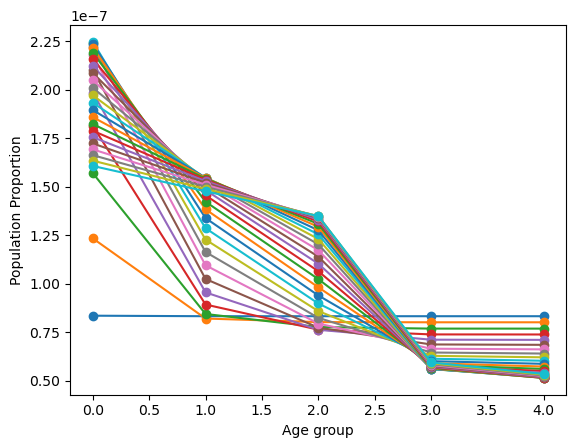

In [158]:
N = 5
pop = 12000000
#y0 = 800000/pop,1600000/pop,900000/pop,8000000/pop,700000/pop,0,0,0,0,0,0,0,0,0,0

alpha1 = 800000/pop
alpha2 = 1600000/pop
alpha3 = 900000/pop
alpha4 = 8000000/pop
alpha5 = 700000/pop

gamma = 1/(7.0)
beta_0 = 0.8*gamma # even like different from 0 it's the same
beta_aug = 3*gamma
#print(beta_aug/gamma)
#print(beta_0/gamma)
t_start = 0
t_season = 60
t_year = 365


l1 = 1/(365*5)
nu = alpha1*l1
l2 = l1*alpha1/alpha2
l3 = l2*alpha2/alpha3
l4 = l3*alpha3/alpha4
mu = l4*alpha4/alpha5

#print(nu/l1,alpha1)

l_vec = np.array([l1,l2,l3,l4,0])
mu_vec = np.array([0,0,0,0,mu])



y0 = alpha1,alpha2,alpha3,(8000000-1)/pop,alpha5,0,0,0,1/pop,0,0,0,0,0,0,0,0,0,1/pop,0

ret = odeint(n_groups_seasonal_model, y0, t_total, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))

seasons = 30
prop_imported = 0.00001
t_total = np.arange(0,365*seasons,1)
t_season_single = np.arange(0,365,1)

for season in np.arange(seasons):
    ret = odeint(n_groups_seasonal_model, y0, t_season_single, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))
    y0 = ret[-1,:].copy()
    y0 = modify_initial_condition(y0,prop_imported)
    inf_total = pop*(ret[1:,15:] - ret[:-1,15:]).sum(axis = 1).sum()
    #print((ret[364,10:]*pop - ret[0,10:]*pop).sum())
    prop_pop = np.array([alpha1,alpha2,alpha3,alpha4,alpha5])*pop*inf_total
    plt.plot((pop/prop_pop)*(ret[1:,15:] - ret[:-1,15:]).sum(axis = 0), '-o', label = season)
    plt.ylabel('Population Proportion')
    plt.xlabel('Age group')
    #plt.legend()
plt.show()

## Attempt 6: seasonal transmission high season and low season + non-continuous + deterministic reintroductions on adults
- includes seasonal transmission, random reintroductions
- high season wih an R0 of 2, low season of no transmission
- purely seasonal disease driven by reintroductions
- we run season by season and include an introduction

2.0
0.8
0.06666666666666667 0.06666666666666667


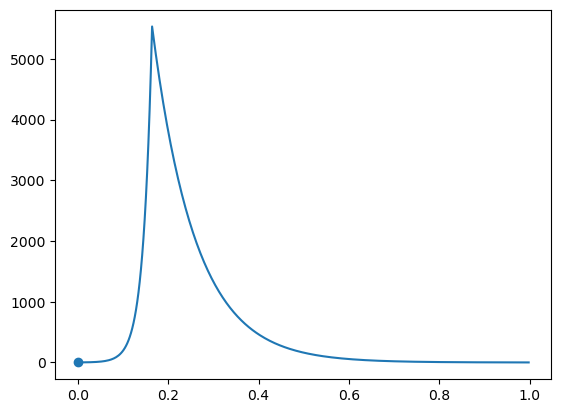

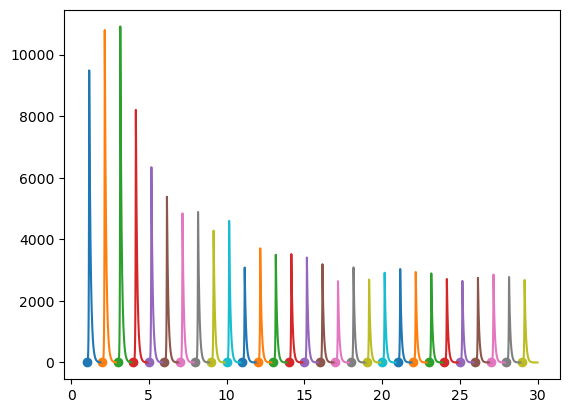

In [162]:
N = 5
pop = 12000000
#y0 = 800000/pop,1600000/pop,900000/pop,8000000/pop,700000/pop,0,0,0,0,0,0,0,0,0,0

alpha1 = 800000/pop
alpha2 = 1600000/pop
alpha3 = 900000/pop
alpha4 = 8000000/pop
alpha5 = 700000/pop

gamma = 1/(7.0)
beta_0 = 0.8*gamma # even like different from 0 it's the same
beta_aug = 2*gamma
print(beta_aug/gamma)
print(beta_0/gamma)
t_start = 0
t_season = 60
t_year = 365


l1 = 1/(365*5)
nu = alpha1*l1
l2 = l1*alpha1/alpha2
l3 = l2*alpha2/alpha3
l4 = l3*alpha3/alpha4
mu = l4*alpha4/alpha5

print(nu/l1,alpha1)

l_vec = np.array([l1,l2,l3,l4,0])
mu_vec = np.array([0,0,0,0,mu])


t_total = np.linspace(0, 365*10, 10000)

y0 = alpha1,alpha2,alpha3,(8000000-1)/pop,alpha5,0,0,0,1/pop,0,0,0,0,0,0,0,0,0,1/pop,0

prop_imported = 0
ret = odeint(n_groups_seasonal_model, y0, t_total, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))

seasons = 30
t_total = np.arange(0,365*seasons,1)
t_season_single = np.arange(0,365,1)

for season in np.arange(seasons):
    ret = odeint(n_groups_seasonal_model, y0, t_season_single, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))
    y0 = ret[-1,:].copy()
    y0 = modify_initial_condition_2(y0,prop_imported)
    plt.plot((t_season_single+season*365)/365,ret[:,N:2*N].sum(axis=1)*pop, label = season)
    plt.scatter((season*365)/365,y0[N:2*N].sum())
    if(season == 0):
        plt.show()
#plt.legend()
plt.show()

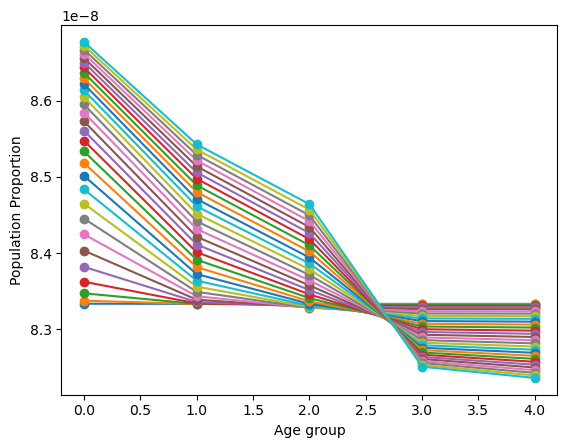

In [164]:
N = 5
pop = 12000000
#y0 = 800000/pop,1600000/pop,900000/pop,8000000/pop,700000/pop,0,0,0,0,0,0,0,0,0,0

alpha1 = 800000/pop
alpha2 = 1600000/pop
alpha3 = 900000/pop
alpha4 = 8000000/pop
alpha5 = 700000/pop

gamma = 1/(7.0)
beta_0 = 0.8*gamma # even like different from 0 it's the same
beta_aug = 2*gamma
#print(beta_aug/gamma)
#print(beta_0/gamma)
t_start = 0
t_season = 60
t_year = 365


l1 = 1/(365*5)
nu = alpha1*l1
l2 = l1*alpha1/alpha2
l3 = l2*alpha2/alpha3
l4 = l3*alpha3/alpha4
mu = l4*alpha4/alpha5

#print(nu/l1,alpha1)

l_vec = np.array([l1,l2,l3,l4,0])
mu_vec = np.array([0,0,0,0,mu])



y0 = alpha1,alpha2,alpha3,(8000000-1)/pop,alpha5,0,0,0,1/pop,0,0,0,0,0,0,0,0,0,1/pop,0

ret = odeint(n_groups_seasonal_model, y0, t_total, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))

seasons = 30
prop_imported = 0.00001
t_total = np.arange(0,365*seasons,1)
t_season_single = np.arange(0,365,1)

for season in np.arange(seasons):
    ret = odeint(n_groups_seasonal_model, y0, t_season_single, args=(N, pop, nu, beta_0,beta_aug,t_start,t_season,t_year, gamma, mu_vec, l_vec))
    y0 = ret[-1,:].copy()
    y0 = modify_initial_condition_2(y0,prop_imported)
    inf_total = pop*(ret[1:,15:] - ret[:-1,15:]).sum(axis = 1).sum()
    #print((ret[364,10:]*pop - ret[0,10:]*pop).sum())
    prop_pop = np.array([alpha1,alpha2,alpha3,alpha4,alpha5])*pop*inf_total
    plt.plot((pop/prop_pop)*(ret[1:,15:] - ret[:-1,15:]).sum(axis = 0), '-o', label = season)
    plt.ylabel('Population Proportion')
    plt.xlabel('Age group')
    #plt.legend()
plt.show()